In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

############################################################################################################

In [2]:
#pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
import pprint
glass = fetch_ucirepo(id=42) #klasifikacija na vidovi na stakla spored nivniot hemiski sostav
X = glass.data.features #atributi
y = glass.data.targets #vrednosti za celnata promenliva

pprint.pp(glass.metadata)

{'uci_id': 42,
 'name': 'Glass Identification',
 'repository_url': 'https://archive.ics.uci.edu/dataset/42/glass+identification',
 'data_url': 'https://archive.ics.uci.edu/static/public/42/data.csv',
 'abstract': 'From USA Forensic Science Service; 6 types of glass; defined in '
             'terms of their oxide content (i.e. Na, Fe, K, etc)',
 'area': 'Physics and Chemistry',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 214,
 'num_features': 9,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['Type_of_glass'],
 'index_col': ['Id_number'],
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1987,
 'last_updated': 'Thu Aug 10 2023',
 'dataset_doi': '10.24432/C5WW2P',
 'creators': ['B. German'],
 'intro_paper': None,
 'additional_info': {'summary': 'Vina conducted a comparison test of her '
                                'rule-based system, BEAGLE, the '
                                'neare

In [3]:
#target_names = np.unique(Y)
#number_of_classes=len(target_names)
#feature_names=np.unique(X)
#number_of_features = len(feature_names)
#print("Број и имиња на класи:",number_of_classes,target_names)

#feature_names = glass.metadata.features  
feature_names = list(X.columns)
target_names = np.unique(y) 

number_of_classes = len(target_names) 
number_of_features = X.shape[1]  
number_of_instances = X.shape[0]  

print("Број и имиња на класи:", number_of_classes, target_names)
print("Број и имиња на атрибути:", number_of_features, feature_names)
print("Број на податочни примероци:", number_of_instances)

Број и имиња на класи: 6 [1 2 3 5 6 7]
Број и имиња на атрибути: 9 ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
Број на податочни примероци: 214


In [4]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [5]:
y

,Type_of_glass
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [6]:
df = pd.DataFrame(glass.data.features, columns=glass.data.feature_names)
print(df.head(10))

        RI     Na    Mg    Al     Si     K    Ca   Ba    Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00
5  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26
6  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00
7  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00
8  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00
9  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11


In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [8]:
df.isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

In [71]:
df.value_counts("K")

K
0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
1.10     1
1.46     1
1.68     1
1.76     1
2.70     1
Name: count, Length: 65, dtype: int64

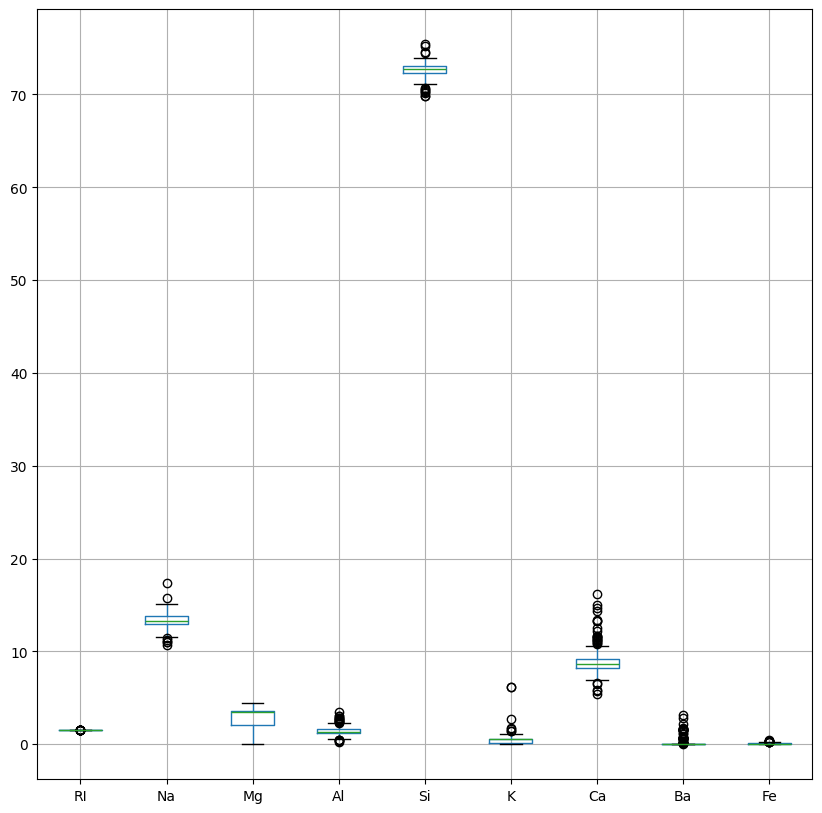

In [9]:
#VIZUELIZACIJA
figure = plt.figure(figsize=(10, 10))
df.boxplot()
plt.show()

In [85]:
from scipy.stats import zscore

df = pd.DataFrame(X, columns=glass.feature_names)

#Kalkuliraj Z-scores za site numerichki koloni
z_scores = df.apply(zscore)

#identifikuvame outlieri, vo sluchajov zedov z_score > 3
outliers = (z_scores.abs() > 3).any(axis=1)

num_outliers = outliers.sum()
outlier_samples = df[outliers]

print(f"Број на outliers: {num_outliers}")
print("Outlier примероци:")
print(outlier_samples)


Број на outliers: 20
Outlier примероци:
          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe
105  1.52475  11.45  0.00  1.88  72.19  0.81  13.24  0.00  0.34
106  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28
107  1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24
110  1.52664  11.23  0.00  0.77  73.21  0.00  14.68  0.00  0.00
111  1.52739  11.02  0.00  0.75  73.08  0.00  14.96  0.00  0.00
112  1.52777  12.64  0.00  0.67  72.02  0.06  14.40  0.00  0.00
131  1.52614  13.70  0.00  1.36  71.24  0.19  13.44  0.00  0.10
145  1.51839  12.85  3.67  1.24  72.57  0.62   8.68  0.00  0.35
162  1.52211  14.19  3.78  0.91  71.36  0.23   9.14  0.00  0.37
163  1.51514  14.01  2.68  3.50  69.89  1.68   5.87  2.20  0.00
171  1.51316  13.02  0.00  3.04  70.48  6.21   6.96  0.00  0.00
172  1.51321  13.00  0.00  3.02  70.70  6.21   6.93  0.00  0.00
174  1.52058  12.85  1.61  2.17  72.18  0.76   9.70  0.24  0.51
184  1.51115  17.38  0.00  0.34  75.41  0.00   6.65  0.00  0.00


In [11]:
#Atributite Ba, Mg, K, i Ca imaat golemi otstapuvanja, pa poradi toa jas bi gi otstranila.

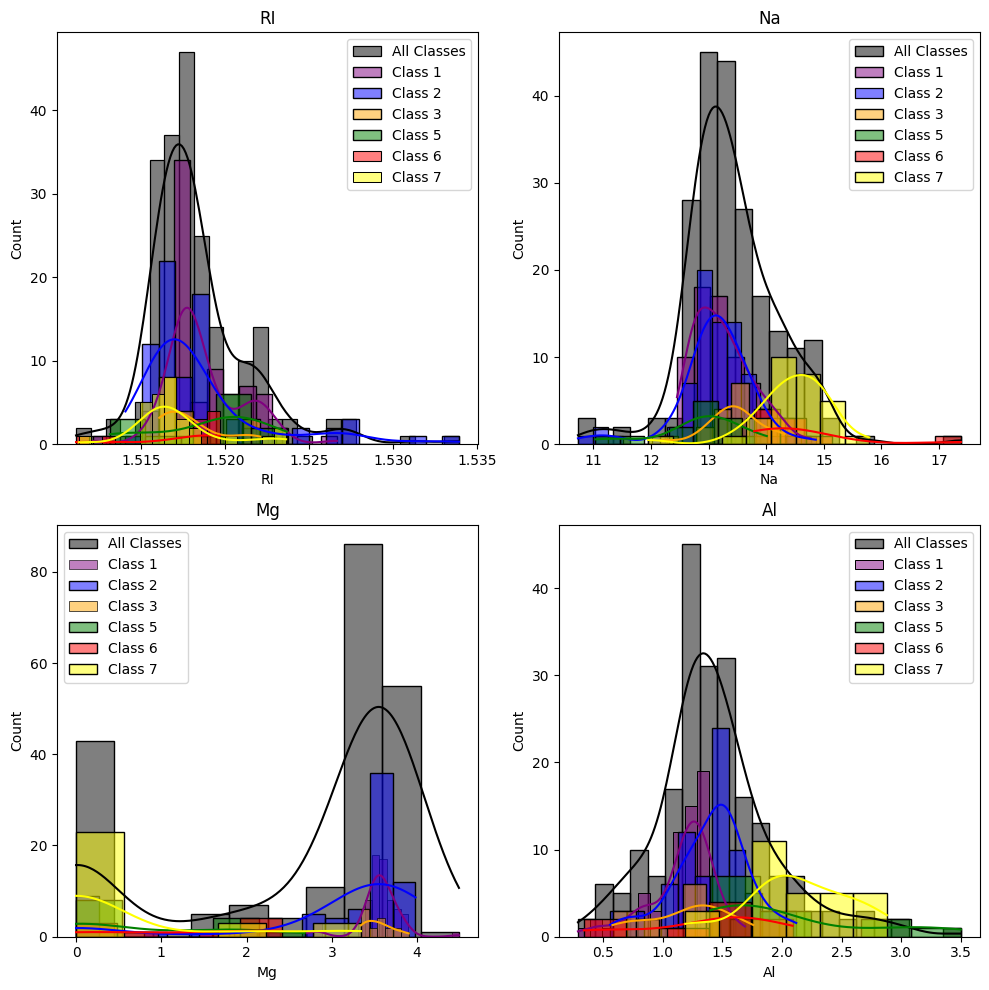

In [101]:
colors = ['purple', 'blue', 'orange', 'green', 'red', 'yellow']
fig = plt.figure(figsize=(10, 10))
fig.subplots(nrows=2, ncols=2)

y_array = y.to_numpy().ravel()  

for feature in range(min(4,number_of_features)):  
    ax = plt.subplot(2, 2, feature + 1)
    plt.title(feature_names[feature])

    sns.histplot(X.iloc[:, feature], color='black', label='All Classes', kde=True, stat="count")

    for class_idx, class_label in enumerate(np.unique(y_array)):  
        sns.histplot(X.iloc[y_array == class_label, feature], 
                     color=colors[class_idx % len(colors)],  
                     label=f"Class {class_label}", kde=True, stat="count")

    plt.legend()

plt.tight_layout()  
plt.show()


C:\Users\Marija\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: 
The palette list has fewer values (6) than needed (65) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
C:\Users\Marija\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: 
The palette list has fewer values (6) than needed (65) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
C:\Users\Marija\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: 
The palette list has fewer values (6) than needed (65) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
C:\Users\Marija\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: 
The palette list has fewer values (6) than needed (65) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
C:\U

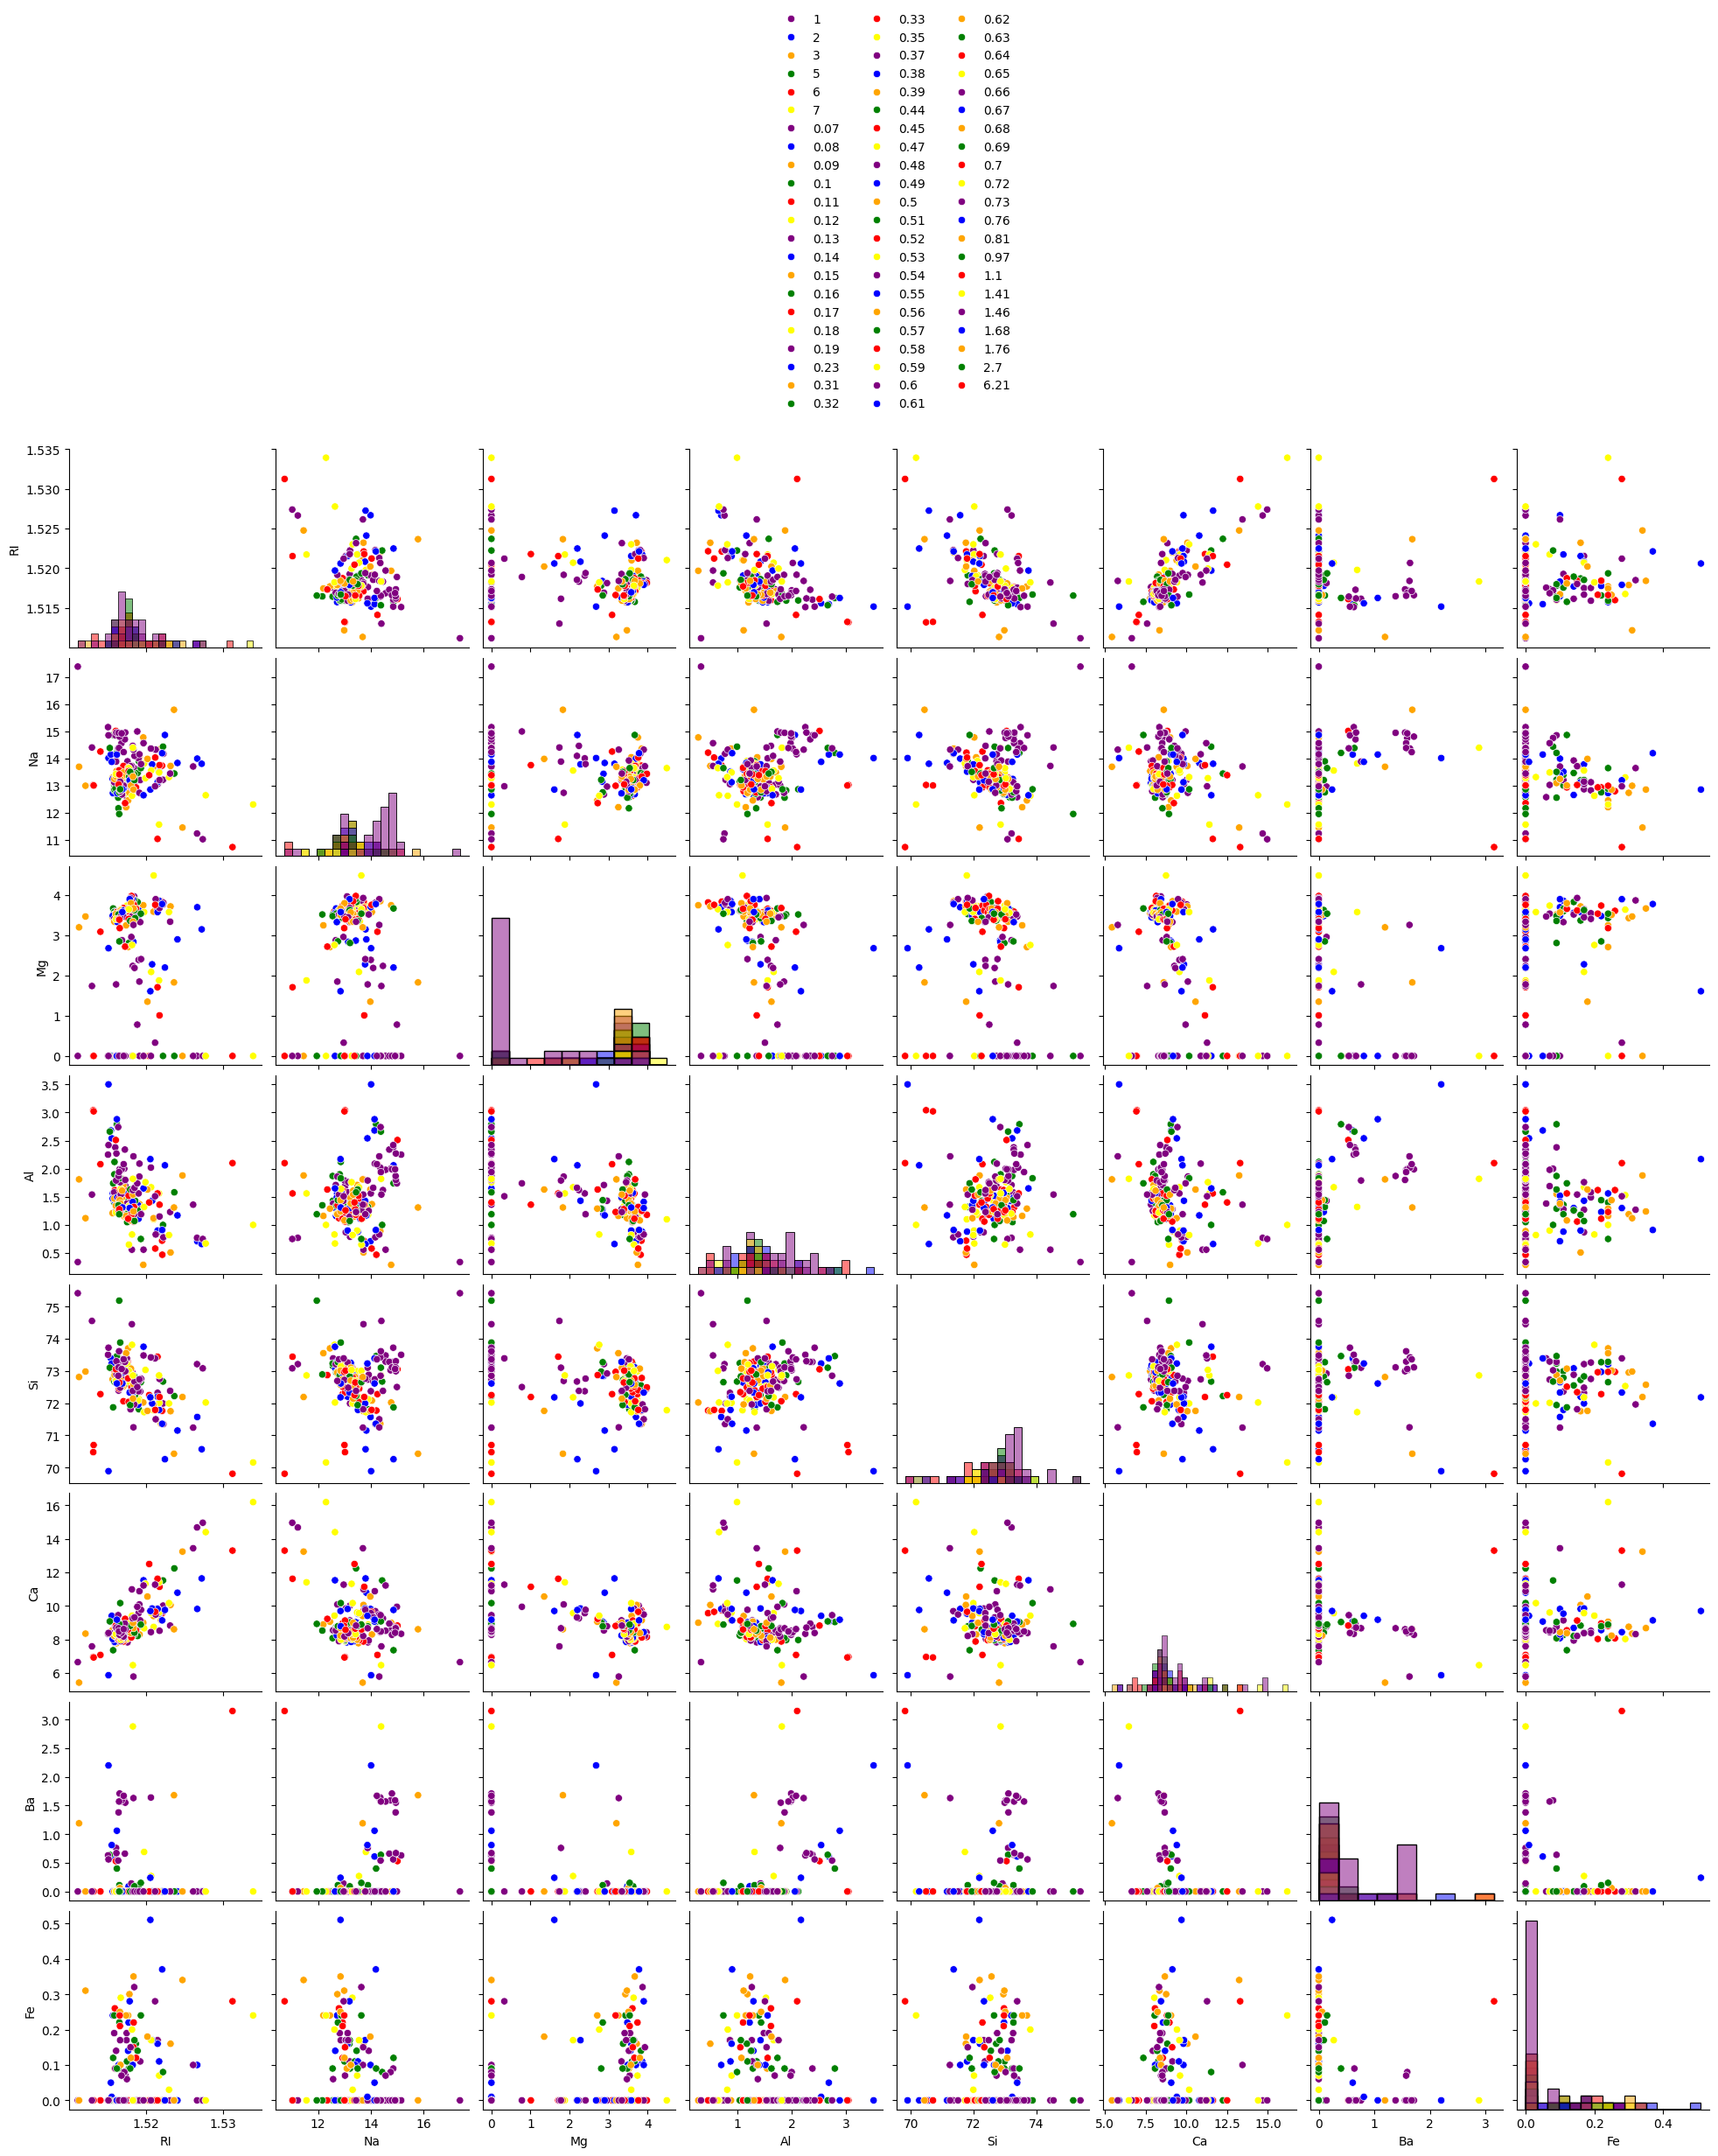

In [106]:
g=sns.pairplot(df, hue="K", diag_kind="hist",palette=colors);
sns.move_legend(g, "lower center",bbox_to_anchor=(.5, 1),ncol=3, title=None);
for t, l in zip(g._legend.texts, target_names):
    t.set_text(l)

C:\Users\Marija\AppData\Local\Temp\ipykernel_6084\476138350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_subset['target'] = y
C:\Users\Marija\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\Marija\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\Marija\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer value

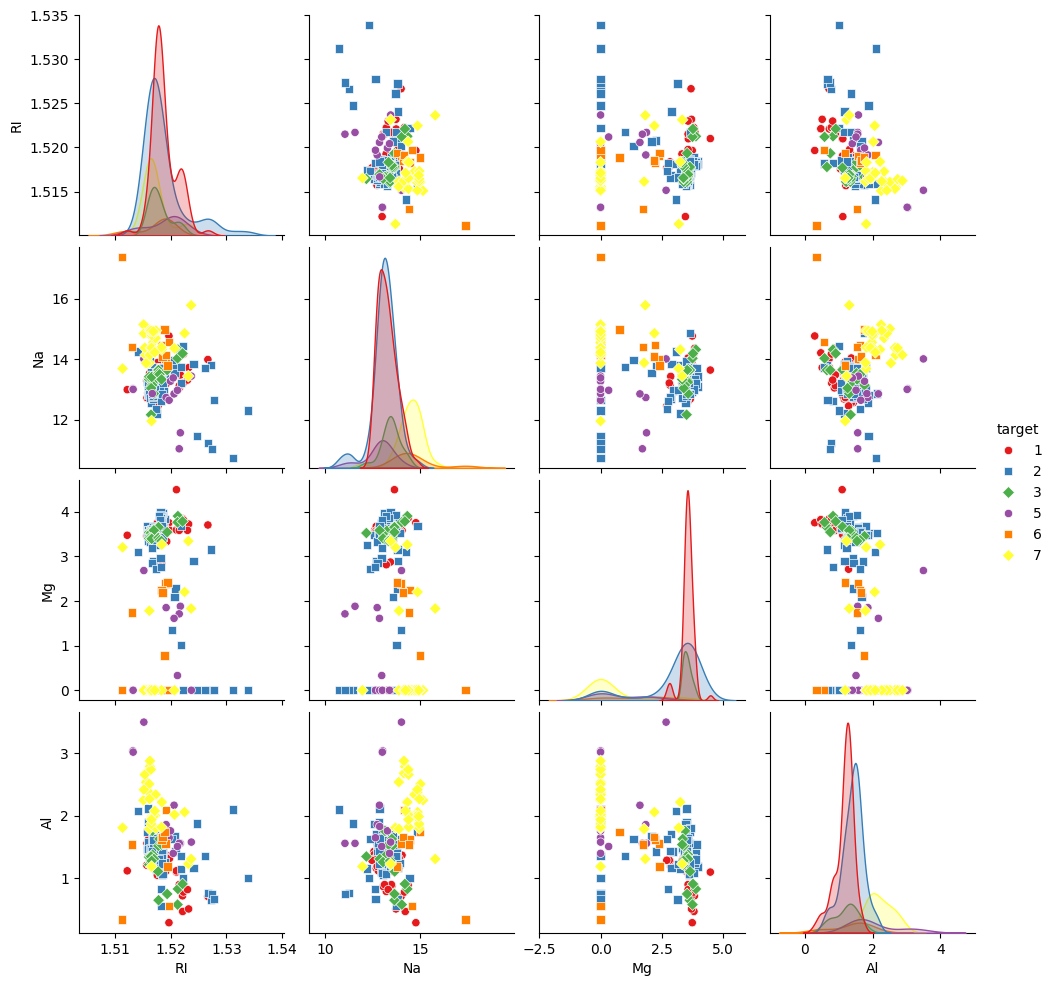

In [ ]:
X_df = pd.DataFrame(X, columns=glass.data.feature_names)  
X_subset = X_df.iloc[:, :4]  
X_subset['target'] = y

sns.pairplot(X_subset, hue='target', palette='Set1', markers=["o", "s", "D"])

C:\Users\Marija\AppData\Local\Temp\ipykernel_6084\3458192668.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_subset['target'] = y


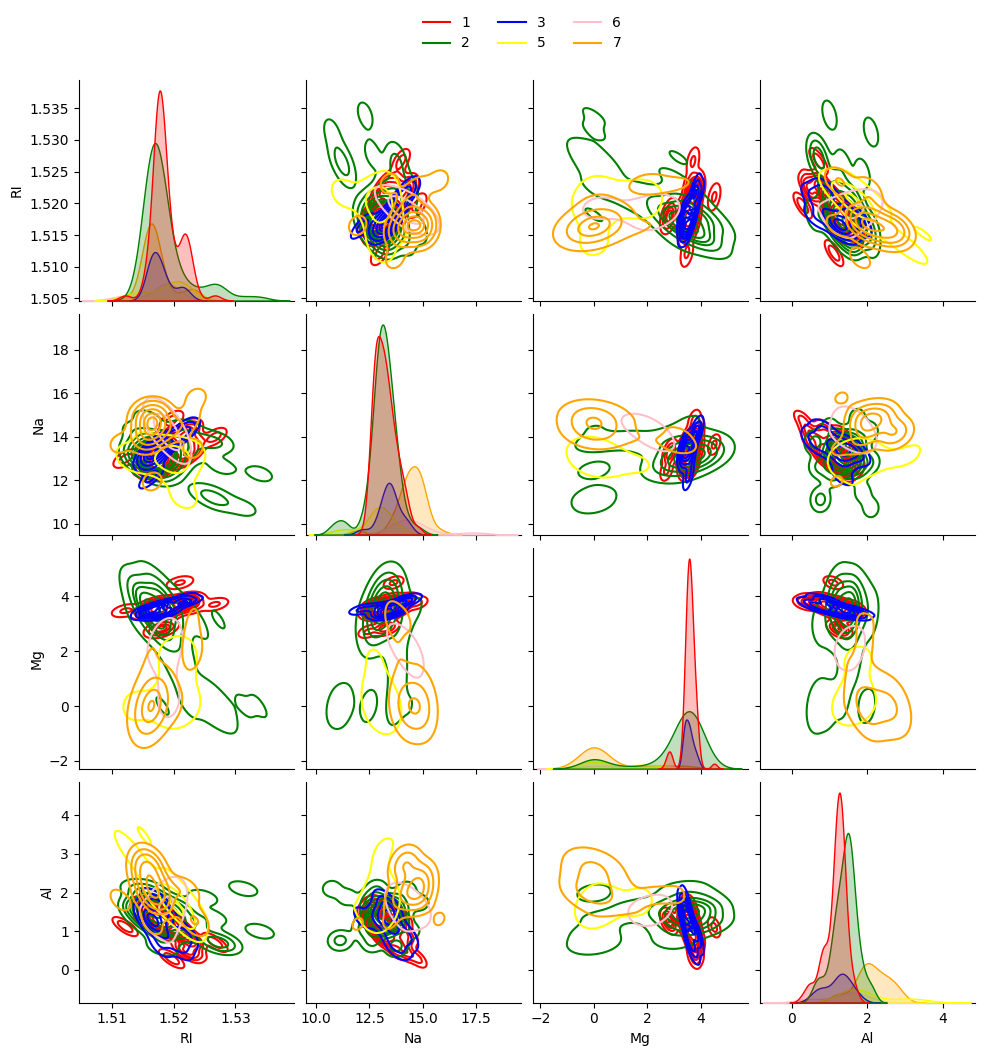

In [113]:
X_df = pd.DataFrame(X, columns=glass.data.feature_names)  # Create a DataFrame with feature names
X_subset = X_df.iloc[:, :4]  # Select only the first 4 features

# Add the target variable as a new column
X_subset['target'] = y

# Define colors and target names
colors = ["red", "green", "blue", "yellow", "pink", "orange"]  # Set the colors for each class
target_names = np.unique(y)  # Get the unique target names

# Create the pairplot with KDE
g = sns.pairplot(X_subset, hue="target", kind="kde", palette=colors)

# Move the legend to the lower center
sns.move_legend(g, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None)

# Update legend labels with target names
for t, l in zip(g._legend.texts, target_names):
    t.set_text(l)

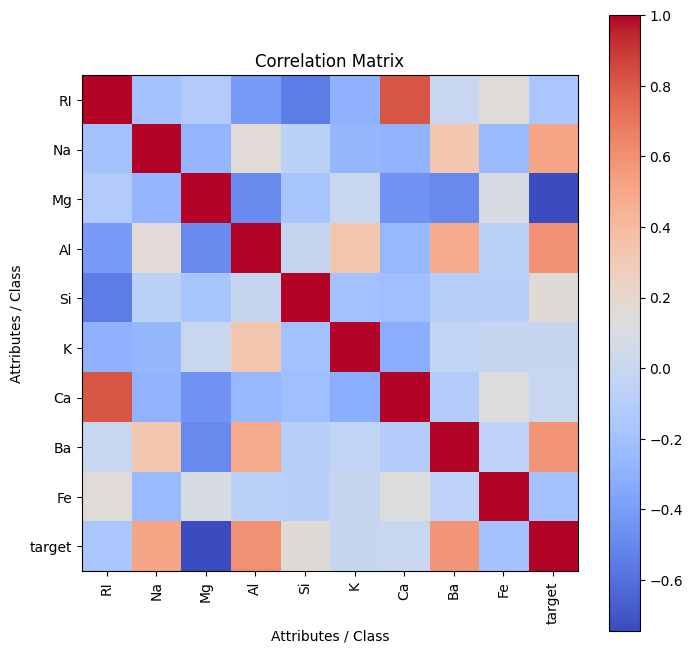

In [ ]:
correlation_matrix = np.zeros((number_of_features + 1, number_of_features + 1))

y = np.ravel(y)  

for feature_i in range(number_of_features): 
    for feature_j in range(number_of_features):
        corr, _ = stats.pearsonr(X.iloc[:, feature_i], X.iloc[:, feature_j])  
        correlation_matrix[feature_i][feature_j] = corr

for feature_i in range(number_of_features): 
    target_i = number_of_features
    corr, _ = stats.pearsonr(X.iloc[:, feature_i], y)  
    correlation_matrix[feature_i][target_i] = corr  
    correlation_matrix[target_i][feature_i] = corr 

corr, _ = stats.pearsonr(y, y)
correlation_matrix[target_i][target_i] = corr 

plt.figure(figsize=(8, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(np.arange(number_of_features + 1), list(X.columns) + ['target'], rotation=90)
plt.yticks(np.arange(number_of_features + 1), list(X.columns) + ['target'])
plt.xlabel("Attributes / Class")
plt.ylabel("Attributes / Class")
plt.title("Correlation Matrix")
plt.show()

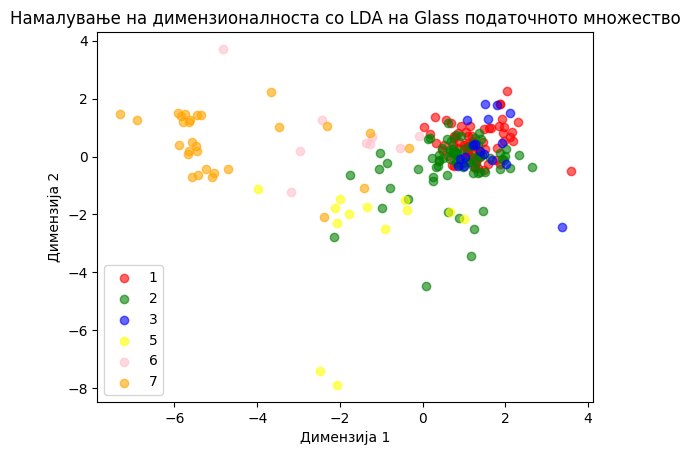

In [119]:
y_array = y.ravel() 

LDA_reduce = LinearDiscriminantAnalysis(n_components=2) 
LDA_reduce.fit(X, y_array) 
X_reduced = LDA_reduce.transform(X) 

plt.figure()

for color, i, target_name in zip(colors, np.unique(y_array), target_names):
    plt.scatter(X_reduced[y_array == i, 0], X_reduced[y_array == i, 1], alpha=.6, color=color,
                label=target_name)

plt.legend()
plt.xlabel("Димензија 1")
plt.ylabel("Димензија 2")
plt.title("Намалување на димензионалноста со LDA на Glass податочното множество")
plt.show()



In [120]:
#PODELBA NA PODATOCHNOTO MNOZHESTVO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

In [121]:
from sklearn.decomposition import PCA
#KVADRATNA DISKRIMINATVINA ANALIZA
y_train = np.array(y_train).ravel()
pca = PCA(n_components=9)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Convert y_train to 1D array
y_train = y_train.ravel()

# Fit QDA with transformed data
QDA = QuadraticDiscriminantAnalysis(reg_param=0.1)  # Use regularization to fix covariance issue
QDA.fit(X_train_pca, y_train)

C:\Users\Marija\AppData\Roaming\Python\Python312\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\Marija\AppData\Roaming\Python\Python312\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 4 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


QuadraticDiscriminantAnalysis(reg_param=0.1)

In [122]:
print("Приорните веројатности на класите се",QDA.priors_)

Приорните веројатности на класите се [0.34228188 0.3557047  0.08724832 0.04697987 0.04026846 0.12751678]


In [123]:
y_pred = QDA.predict(X_test)
QDA_accuracy = accuracy_score(y_test,y_pred)
print("Точноста на класификацијата со QDA во оригиналното п.множ. е", round(QDA_accuracy,3))

Точноста на класификацијата со QDA во оригиналното п.множ. е 0.031


C:\Users\Marija\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but QuadraticDiscriminantAnalysis was fitted without feature names
  warnings.warn(


In [124]:
#KLASIFIKACIJA SO LINEARNA DISKRIMINATIVNA ANALIZA
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
y_pred = LDA.predict(X_test)
LDA_accuracy = accuracy_score(y_test,y_pred)
print("Точноста на класификацијата со LDA во оригиналното п.множ. е",round(LDA_accuracy,3))

Точноста на класификацијата со LDA во оригиналното п.множ. е 0.646


In [126]:
#KLASIFIKACIJA SO NAIVEN BAESOV KLASIFIKATOR
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)
GNB_accuracy = accuracy_score(y_test, y_pred)
print("Точноста на класификацијата со GNB во оригиналното п.множ. е",round(GNB_accuracy,3))

Точноста на класификацијата со GNB во оригиналното п.множ. е 0.308


In [127]:
#KLASIFIKACIJA VO REDUCIRANO P.MNOZH.
QDA_reduced = QuadraticDiscriminantAnalysis()
QDA_reduced.fit(X_reduced_train, y_reduced_train)
y_pred = QDA_reduced.predict(X_reduced_test)
QDA_reduced_accuracy = accuracy_score(y_test, y_pred)
print("Точноста на класификацијата со методот QDA во редуцирано п.множ. е", round(QDA_reduced_accuracy,3))

Точноста на класификацијата со методот QDA во редуцирано п.множ. е 0.615


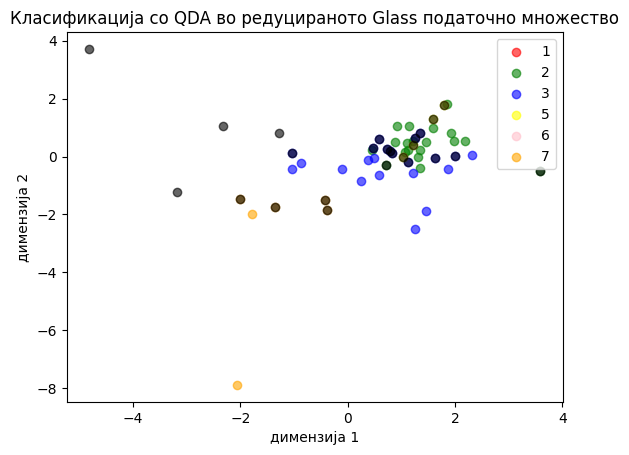

In [128]:
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2,3,4,5], target_names):
    plt.scatter(X_reduced_test[y_test == i, 0], X_reduced_test[y_test == i, 1], alpha=0.6, color=color,
            label=target_name)


incorrect = y_pred != y_reduced_test
for i in range(len(incorrect)):
    if incorrect[i] == True:
        plt.scatter(X_reduced_test[i, 0], X_reduced_test[i, 1], alpha=.6, color="black")
        
plt.legend()
plt.xlabel("димензија 1")
plt.ylabel("димензија 2")
plt.title('Класификација со QDA во редуцираното Glass податочно множество');

In [129]:
LDA_reduced = LinearDiscriminantAnalysis(solver='lsqr')
LDA_reduced.fit(X_reduced_train, y_reduced_train)
y_pred = LDA_reduced.predict(X_reduced_test)
LDA_reduced_accuracy = accuracy_score(y_test,y_pred)
print("Точноста на класификацијата со методот LDA во редуцирано п.множ. е", round(LDA_reduced_accuracy,3))

Точноста на класификацијата со методот LDA во редуцирано п.множ. е 0.692


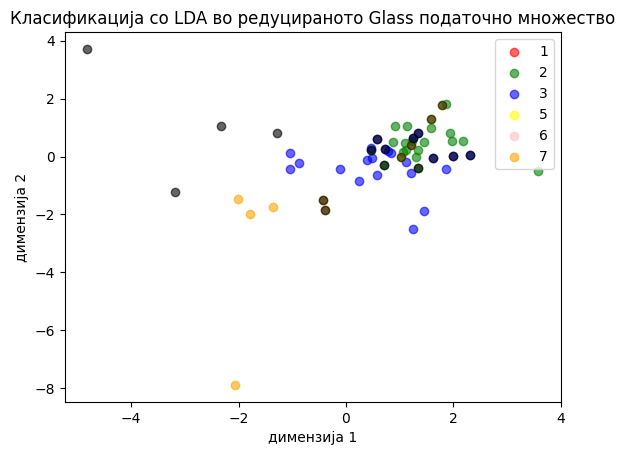

In [130]:
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5], target_names):
    plt.scatter(X_reduced_test[y_test == i, 0], X_reduced_test[y_test == i, 1], alpha=.6, color=color,
                label=target_name)

incorrect = y_pred!=y_reduced_test
for i in range(len(incorrect)):
    if(incorrect[i]==True):
        plt.scatter(X_reduced_test[i][0], X_reduced_test[i][1], alpha=.6, color="black")
        
plt.legend()
plt.xlabel("димензија 1")
plt.ylabel("димензија 2")
plt.title('Класификација со LDA во редуцираното Glass податочно множество');

In [131]:
GNB_reduced = GaussianNB()
GNB_reduced.fit(X_reduced_train, y_reduced_train)
y_pred = GNB_reduced.predict(X_reduced_test)
GNB_reduced_accuracy = accuracy_score(y_test,y_pred)
print("Точноста на класификацијата со методот GNB во редуцирано п.множ. е", round(GNB_reduced_accuracy,3))

Точноста на класификацијата со методот GNB во редуцирано п.множ. е 0.631


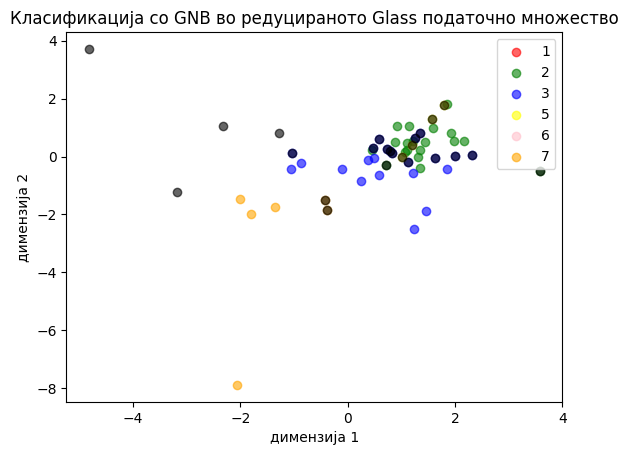

In [132]:
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2,3,4,5], target_names):
    plt.scatter(X_reduced_test[y_test == i, 0], X_reduced_test[y_test == i, 1], alpha=.6, color=color,
                label=target_name)

incorrect = y_pred!=y_reduced_test
for i in range(len(incorrect)):
    if(incorrect[i]==True):
        plt.scatter(X_reduced_test[i][0], X_reduced_test[i][1], alpha=.6, color="black")
        
plt.legend()
plt.xlabel("димензија 1")
plt.ylabel("димензија 2")
plt.title('Класификација со GNB во редуцираното Glass податочно множество');

In [ ]:
#VIZUELIZACIJA NA ISTRENIRANITE MODELI
def plot_data(lda, X, y, y_pred):
    splot = plt.subplot(1, 1, 1) 

    true = y == y_pred  
    true0, true1, true2, true3, true5, true6 = true[y == 0], true[y == 1], true[y == 2], true[y == 3], true[y == 5], true[y == 6]
    X0, X1, X2, X3, X5, X6 = X[y == 0], X[y == 1], X[y == 2], X[y == 3], X[y == 5], X[y == 6]
    X0_true, X0_false = X0[true0], X0[~true0]
    X1_true, X1_false = X1[true1], X1[~true1]
    X2_true, X2_false = X2[true2], X2[~true2]
    X3_true, X3_false = X3[true3], X3[~true3]
    X5_true, X5_false = X5[true5], X5[~true5]
    X6_true, X6_false = X6[true6], X6[~true6]

    plt.scatter(X0_true[:, 0], X0_true[:, 1], alpha=.6, color="purple", label='0')
    plt.scatter(X0_false[:, 0], X0_false[:, 1], marker="x", s=20, color="purple")

    plt.scatter(X1_true[:, 0], X1_true[:, 1], alpha=.6, color="blue", label='1')
    plt.scatter(X1_false[:, 0], X1_false[:, 1], marker="x", s=20, color="blue")
    
    plt.scatter(X2_true[:, 0], X2_true[:, 1], alpha=.6, color="orange", label='2')
    plt.scatter(X2_false[:, 0], X2_false[:, 1], marker="x", s=20, color="orange")

    plt.scatter(X3_true[:, 0], X3_true[:, 1], alpha=.6, color="yellow", label='3')
    plt.scatter(X3_false[:, 0], X3_false[:, 1], marker="x", s=20, color="yellow")

    plt.scatter(X5_true[:, 0], X5_true[:, 1], alpha=.6, color="red", label='5')
    plt.scatter(X5_false[:, 0], X5_false[:, 1], marker="x", s=20, color="red")

    plt.scatter(X6_true[:, 0], X6_true[:, 1], alpha=.6, color="green", label='6')
    plt.scatter(X6_false[:, 0], X6_false[:, 1], marker="x", s=20, color="green")

    nx, ny = 100, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.contour(xx, yy, Z, [0.5], colors="black")

    for i, target_name in zip(range(len(lda.means_)), np.unique(y)):
        plt.plot(lda.means_[i][0], lda.means_[i][1], "s", markersize=15, label=f"Mean {target_name}")

    return splot


def plot_lda_cov(lda, splot):
    for i, color in zip(range(len(lda.means_)), ["purple", "blue", "orange", "yellow", "red", "green"]):
        plot_ellipse(splot, lda.means_[i], lda.covariance_, color)

    

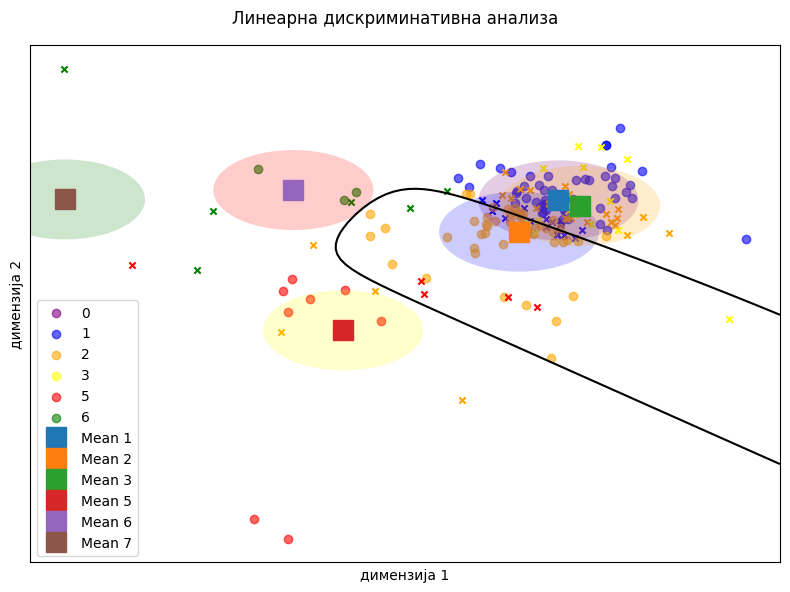

In [ ]:
plt.figure(figsize=(8, 6))
plt.suptitle("Линеарна дискриминативна анализа")

lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X_reduced, y).predict(X_reduced)
splot = plot_data(lda, X_reduced, y, y_pred)

plot_lda_cov(lda, splot)

plt.axis("tight")
plt.legend()
plt.xlabel("димензија 1")
plt.ylabel("димензија 2")
plt.tight_layout()
plt.show()

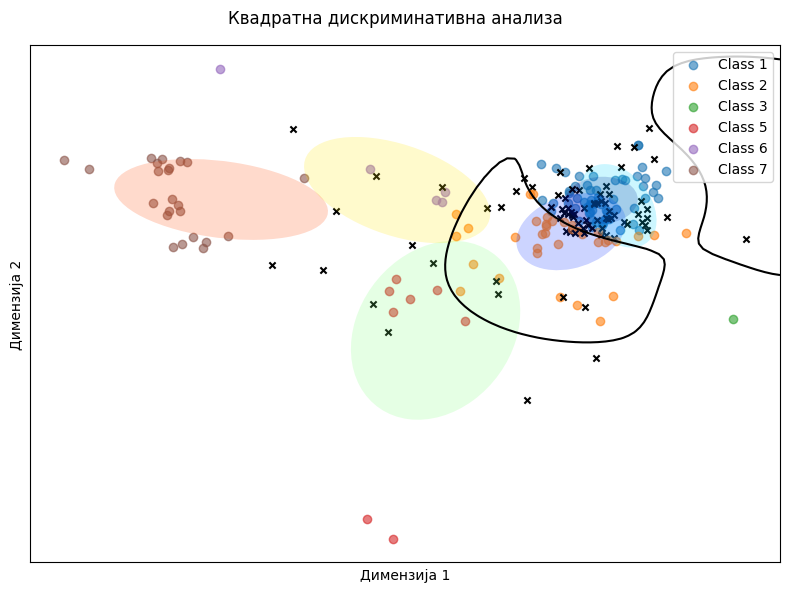

In [ ]:
def plot_data(qda, X, y, y_pred):
    splot = plt.subplot(1, 1, 1)
    
    true = y == y_pred
    for i in np.unique(y):
        true_class = true[y == i]
        false_class = ~true_class
        class_data = X[y == i]
        
        plt.scatter(class_data[true_class, 0], class_data[true_class, 1], alpha=0.6, label=f"Class {i}")
        plt.scatter(class_data[false_class, 0], class_data[false_class, 1], marker="x", color="black", s=20)
    
    nx, ny = 100, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
    
    Z = qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.contour(xx, yy, Z, [0.5], colors="black")

    return splot

def plot_ellipse(splot, mean, cov, color):
    from scipy import linalg
    import matplotlib.patches as patches
    
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi
    ell = patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5, angle=180 + angle, facecolor=color, alpha=0.2)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())

def plot_qda_cov(qda, splot):
    for i in range(len(qda.means_)):
        plot_ellipse(splot, qda.means_[i], qda.covariance_[i], color=plt.cm.jet(i / len(qda.means_)))

plt.figure(figsize=(8, 6))
plt.suptitle("Квадратна дискриминативна анализа")

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred = qda.fit(X_reduced, y).predict(X_reduced)

splot = plot_data(qda, X_reduced, y, y_pred)
plot_qda_cov(qda, splot)

plt.axis("tight")
plt.legend()
plt.xlabel("Димензија 1")
plt.ylabel("Димензија 2")
plt.tight_layout()
plt.show()